In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

font = {'size'   : 18}

In [72]:
## read data 
## http://csrankings.org/#/index?vision&mlmining&nlp&ir&arch&comm&sec&mod&hpc&mobile&metrics&ops&plan&soft&act&crypt&log&graph&chi&robotics&bio&da&bed&visualization&ecom&us

## Artificial intelligence (AAAI, IJCAI)
id_AI = pd.read_csv('AI_paperids.tsv', sep = '\t', header = None, names = ['paper_id','venue'])
citation_AI = pd.read_csv('papercitationscience_result_AI.tsv', sep = '\t', header = None, 
                          names = ['patent_id', 'title', 'paper_id', 'app', 'number'])
year_AI = pd.read_csv('paperyear_result_AI.tsv', sep = ',', usecols = ['paperid','year'])
year_AI.columns = ['paper_id','year']

## Computer vision (CVPR, ECCV, ICCV)
id_CV = pd.read_csv('CV_paperids.tsv', sep = '\t', header = None, names = ['paper_id','venue'])
citation_CV = pd.read_csv('papercitationscience_result_CV.tsv', sep = '\t', header = None, 
                          names = ['patent_id', 'title', 'paper_id', 'app', 'number'])
year_CV = pd.read_csv('paperyear_result_CV.tsv', sep = ',', usecols = ['paperid','year'])
year_CV.columns = ['paper_id','year']

## Machine learning and data mining  (CML, KDD, NeurIPS/NIPS)
id_ML = pd.read_csv('ML_paperids.tsv', sep = '\t', header = None, names = ['paper_id','venue'])
citation_ML = pd.read_csv('papercitationscience_result_ML.tsv', sep = '\t', header = None, 
                          names = ['patent_id', 'title', 'paper_id', 'app', 'number'])
year_ML = pd.read_csv('paperyear_result_ML.tsv', sep = ',', usecols = ['paperid','year'])
year_ML.columns = ['paper_id','year']

## Natural language processing (ACL, EMNLP, NAACL)
id_NLP = pd.read_csv('NLP_paperids.tsv', sep = '\t', header = None, names = ['paper_id','venue'])
citation_NLP = pd.read_csv('papercitationscience_result_NLP.tsv', sep = '\t', header = None, 
                          names = ['patent_id', 'title', 'paper_id', 'app', 'number'])
year_NLP = pd.read_csv('paperyear_result_NLP.tsv', sep = ',', usecols = ['paperid','year'])
year_NLP.columns = ['paper_id','year']

## Web and information retrieval (SIGIR, WWW)
id_web = pd.read_csv('web_paperids.tsv', sep = '\t', header = None, names = ['paper_id','venue'])
citation_web = pd.read_csv('papercitationscience_result_web.tsv', sep = '\t', header = None, 
                          names = ['patent_id', 'title', 'paper_id', 'app', 'number'])
year_web = pd.read_csv('paperyear_result_web.tsv', sep = ',', usecols = ['paperid','year'])
year_web.columns = ['paper_id','year']

In [73]:
data_AI = id_AI.merge(citation_AI, how = 'outer', on = 'paper_id').merge(year_AI, how = 'outer', on = 'paper_id')
data_CV = id_CV.merge(citation_CV, how = 'outer', on = 'paper_id').merge(year_CV, how = 'outer', on = 'paper_id')
data_ML = id_ML.merge(citation_ML, how = 'outer', on = 'paper_id').merge(year_ML, how = 'outer', on = 'paper_id')
data_NLP = id_NLP.merge(citation_NLP, how = 'outer', on = 'paper_id').merge(year_NLP, how = 'outer', on = 'paper_id')
data_web = id_web.merge(citation_web, how = 'outer', on = 'paper_id').merge(year_web, how = 'outer', on = 'paper_id')

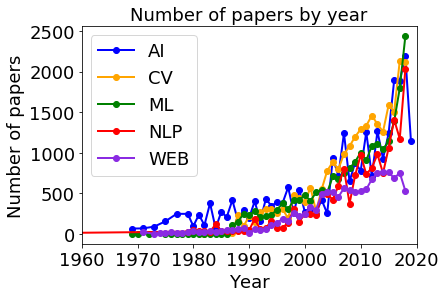

In [74]:
## Plot number of papers per year per field 
paper_AI = pd.DataFrame({'count':year_AI.groupby('year')['paper_id'].value_counts()}).reset_index()
paper_AI = pd.DataFrame({'count': paper_AI.groupby('year')['paper_id'].count()}).reset_index()
paper_CV = pd.DataFrame({'count':year_CV.groupby('year')['paper_id'].value_counts()}).reset_index()
paper_CV = pd.DataFrame({'count': paper_CV.groupby('year')['paper_id'].count()}).reset_index()
paper_ML = pd.DataFrame({'count':year_ML.groupby('year')['paper_id'].value_counts()}).reset_index()
paper_ML = pd.DataFrame({'count': paper_ML.groupby('year')['paper_id'].count()}).reset_index()
paper_NLP = pd.DataFrame({'count':year_NLP.groupby('year')['paper_id'].value_counts()}).reset_index()
paper_NLP = pd.DataFrame({'count': paper_NLP.groupby('year')['paper_id'].count()}).reset_index()
paper_web = pd.DataFrame({'count':year_web.groupby('year')['paper_id'].value_counts()}).reset_index()
paper_web = pd.DataFrame({'count': paper_web.groupby('year')['paper_id'].count()}).reset_index()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([1960,2020])
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Number of papers', fontsize = 18)
plt.title('Number of papers by year', fontsize = 18)
plt.plot(paper_AI['year'], paper_AI['count'], 'o-', label = 'AI', color = 'blue', linewidth = 2)
plt.plot(paper_CV['year'], paper_CV['count'], 'o-', label = 'CV', color = 'orange', linewidth = 2)
plt.plot(paper_ML['year'], paper_ML['count'], 'o-', label = 'ML', color = 'green', linewidth = 2)
plt.plot(paper_NLP['year'], paper_NLP['count'], 'o-', label = 'NLP', color = 'red', linewidth = 2)
plt.plot(paper_web['year'], paper_web['count'], 'o-', label = 'WEB', color = 'blueviolet', linewidth = 2)
plt.legend(loc = 'upper left')
plt.rc('font', **font)
plt.show()

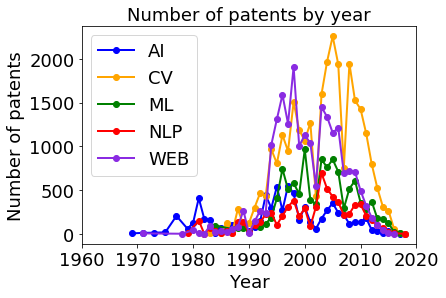

In [75]:
## Plot number of patents per year per field 
patent_AI = pd.DataFrame({'count':data_AI.groupby('year')['patent_id'].value_counts()}).reset_index()
patent_AI = pd.DataFrame({'count': patent_AI.groupby('year')['patent_id'].count()}).reset_index()
patent_CV = pd.DataFrame({'count':data_CV.groupby('year')['patent_id'].value_counts()}).reset_index()
patent_CV = pd.DataFrame({'count': patent_CV.groupby('year')['patent_id'].count()}).reset_index()
patent_ML = pd.DataFrame({'count':data_ML.groupby('year')['patent_id'].value_counts()}).reset_index()
patent_ML = pd.DataFrame({'count': patent_ML.groupby('year')['patent_id'].count()}).reset_index()
patent_NLP = pd.DataFrame({'count':data_NLP.groupby('year')['patent_id'].value_counts()}).reset_index()
patent_NLP = pd.DataFrame({'count': patent_NLP.groupby('year')['patent_id'].count()}).reset_index()
patent_web = pd.DataFrame({'count':data_web.groupby('year')['patent_id'].value_counts()}).reset_index()
patent_web = pd.DataFrame({'count': patent_web.groupby('year')['patent_id'].count()}).reset_index()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([1960,2020])
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Number of patents', fontsize = 18)
plt.title('Number of patents by year', fontsize = 18)
plt.plot(patent_AI['year'], patent_AI['count'], 'o-', label = 'AI', color = 'blue', linewidth = 2)
plt.plot(patent_CV['year'], patent_CV['count'], 'o-', label = 'CV', color = 'orange', linewidth = 2)
plt.plot(patent_ML['year'], patent_ML['count'], 'o-', label = 'ML', color = 'green', linewidth = 2)
plt.plot(patent_NLP['year'], patent_NLP['count'], 'o-', label = 'NLP', color = 'red', linewidth = 2)
plt.plot(patent_web['year'], patent_web['count'], 'o-', label = 'WEB', color = 'blueviolet', linewidth = 2)
plt.legend(loc = 'upper left')
plt.rc('font', **font)
plt.show()

In [76]:
data_AI.groupby(['paper_id'])['patent_id'].count()

paper_id
11895         0
58261         0
63752         0
66799         0
75756         0
             ..
2905578106    0
2905583004    0
2905587047    0
2905589284    0
2906211692    0
Name: patent_id, Length: 26038, dtype: int64

In [77]:
# Calculate proportion of AI research that gets adopted in patents
patent_AI = data_AI.groupby(['paper_id'])['patent_id'].count()
prop_AI = (patent_AI > 0).sum()/patent_AI.shape[0]

patent_CV = data_CV.groupby(['paper_id'])['patent_id'].count()
prop_CV = (patent_CV > 0).sum()/patent_CV.shape[0]

patent_ML = data_ML.groupby(['paper_id'])['patent_id'].count()
prop_ML = (patent_ML > 0).sum()/patent_ML.shape[0]

patent_NLP = data_NLP.groupby(['paper_id'])['patent_id'].count()
prop_NLP = (patent_NLP > 0).sum()/patent_NLP.shape[0]

patent_web = data_web.groupby(['paper_id'])['patent_id'].count()
prop_web = (patent_web > 0).sum()/patent_web.shape[0]

print(prop_AI)
print(prop_CV)
print(prop_ML)
print(prop_NLP)
print(prop_web)

0.05530378677317766
0.24535958216151066
0.12315770081061164
0.11626908689519838
0.22057142857142858


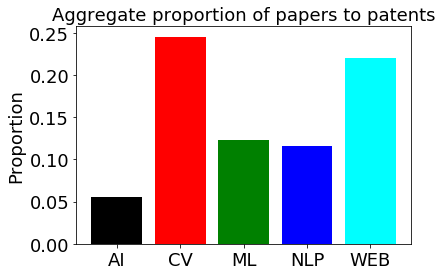

In [78]:
prop = [prop_AI, prop_CV, prop_ML, prop_NLP, prop_web]
bars = ('AI', 'CV', 'ML', 'NLP', 'WEB')
plt.bar(bars, prop, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title('Aggregate proportion of papers to patents', fontsize=18)
plt.ylabel('Proportion', fontsize=18)
plt.rc('font', **font)

# # the average lag of science that influence patent
# subfield = ['AI', 'CV', 'ML', 'NLP', 'WEB']
# prop = [prop_AI, prop_CV, prop_ML, prop_NLP, prop_web]
# sns.barplot(x=subfield, y= prop)
# plt.ylabel('Proportion',fontsize = 20)
# plt.title('Aggregate proportion of papers to patents',fontsize = 20)
# plt.xticks(fontsize = 20)
# plt.yticks(fontsize = 20)
# plt.xlabel('')

In [79]:
# Plot proportion of AI papers ending up in patents across years 
patent_AI_year = pd.DataFrame({'count': data_AI.groupby(['year','paper_id'])['patent_id'].count()}).reset_index()
result_AI = pd.DataFrame(patent_AI_year.groupby('year')['count'].apply(lambda x: sum(x!=0))/patent_AI_year.groupby('year')['paper_id'].count()).reset_index()
result_AI.columns = ['year', 'p']

# fig = plt.figure()
# ax1 = fig.add_subplot(1,1,1)
# plt.plot(result_AI['year'], result_AI['p'], 'k-')
# ax1.set_title('Proportion of AI papers in patents')
# ax1.set_xlabel('Year')
# ax1.set_ylabel('Proportion')

# Plot proportion of CV papers ending up in patents across years 
patent_CV_year = pd.DataFrame({'count': data_CV.groupby(['year','paper_id'])['patent_id'].count()}).reset_index()
result_CV = pd.DataFrame(patent_CV_year.groupby('year')['count'].apply(lambda x: sum(x!=0))/patent_CV_year.groupby('year')['paper_id'].count()).reset_index()
result_CV.columns = ['year', 'p']

# fig = plt.figure()
# ax2 = fig.add_subplot(1,1,1)
# plt.plot(result_CV['year'], result_CV['p'], 'k-')
# ax2.set_title('Proportion of CV papers in patents')
# ax2.set_xlabel('Year')
# ax2.set_ylabel('Proportion')

# Plot proportion of ML papers ending up in patents across years 
patent_ML_year = pd.DataFrame({'count': data_ML.groupby(['year','paper_id'])['patent_id'].count()}).reset_index()
result_ML = pd.DataFrame(patent_ML_year.groupby('year')['count'].apply(lambda x: sum(x!=0))/patent_ML_year.groupby('year')['paper_id'].count()).reset_index()
result_ML.columns = ['year', 'p']

# fig = plt.figure()
# ax2 = fig.add_subplot(1,1,1)
# plt.plot(result_ML['year'], result_ML['p'], 'k-')
# ax2.set_title('Proportion of ML papers in patents')
# ax2.set_xlabel('Year')
# ax2.set_ylabel('Proportion')

# Plot proportion of NLP papers ending up in patents across years 
patent_NLP_year = pd.DataFrame({'count': data_NLP.groupby(['year','paper_id'])['patent_id'].count()}).reset_index()
result_NLP = pd.DataFrame(patent_NLP_year.groupby('year')['count'].apply(lambda x: sum(x!=0))/patent_NLP_year.groupby('year')['paper_id'].count()).reset_index()
result_NLP.columns = ['year', 'p']

# fig = plt.figure()
# ax2 = fig.add_subplot(1,1,1)
# plt.plot(result_NLP['year'], result_NLP['p'], 'k-')
# ax2.set_title('Proportion of NLP papers in patents')
# ax2.set_xlabel('Year')
# ax2.set_ylabel('Proportion')

# Plot proportion of Web papers ending up in patents across years 
patent_web_year = pd.DataFrame({'count': data_web.groupby(['year','paper_id'])['patent_id'].count()}).reset_index()
result_web = pd.DataFrame(patent_web_year.groupby('year')['count'].apply(lambda x: sum(x!=0))/patent_web_year.groupby('year')['paper_id'].count()).reset_index()
result_web.columns = ['year', 'p']

# fig = plt.figure()
# ax2 = fig.add_subplot(1,1,1)
# plt.plot(result_web['year'], result_web['p'], 'k-')
# ax2.set_title('Proportion of web papers in patents')
# ax2.set_xlabel('Year')
# ax2.set_ylabel('Proportion')


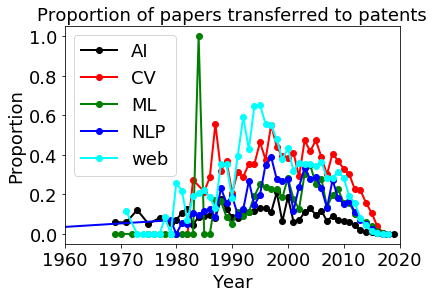

In [80]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([1960,2020])
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Proportion', fontsize = 18)
plt.title('Proportion of papers transferred to patents', fontsize= 18)
plt.plot(result_AI['year'], result_AI['p'], 'o-',label = 'AI', color = 'black', linewidth = 2)
plt.plot(result_CV['year'], result_CV['p'], 'o-',label = 'CV', color = 'red', linewidth = 2)
plt.plot(result_ML['year'], result_ML['p'], 'o-',label = 'ML', color = 'green', linewidth = 2)
plt.plot(result_NLP['year'], result_NLP['p'], 'o-',label = 'NLP', color = 'blue', linewidth = 2)
plt.plot(result_web['year'], result_web['p'], 'o-',label = 'web', color = 'cyan', linewidth = 2)
plt.legend(loc = 'upper left')
plt.rc('font', **font)
plt.show()

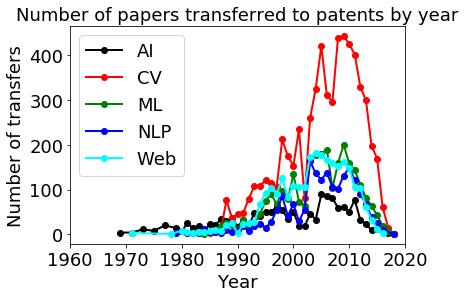

In [81]:
number_year_AI = patent_AI_year[patent_AI_year['count']>0].groupby('year')['count'].count()
number_year_CV = patent_CV_year[patent_CV_year['count']>0].groupby('year')['count'].count()
number_year_ML = patent_ML_year[patent_ML_year['count']>0].groupby('year')['count'].count()
number_year_NLP = patent_NLP_year[patent_NLP_year['count']>0].groupby('year')['count'].count()
number_year_web = patent_web_year[patent_web_year['count']>0].groupby('year')['count'].count()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([1960,2020])
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Number of transfers', fontsize = 18)
plt.title('Number of papers transferred to patents by year', fontsize = 18)
plt.plot(number_year_AI.index, number_year_AI, 'o-', label = 'AI', color = 'black', linewidth = 2)
plt.plot(number_year_CV.index, number_year_CV, 'o-', label = 'CV', color = 'red', linewidth = 2)
plt.plot(number_year_ML.index, number_year_ML, 'o-', label = 'ML', color = 'green', linewidth = 2)
plt.plot(number_year_NLP.index, number_year_NLP, 'o-', label = 'NLP', color = 'blue', linewidth = 2)
plt.plot(number_year_web.index, number_year_web, 'o-', label = 'Web', color = 'cyan', linewidth = 2)
plt.legend(loc = 'upper left')
plt.rc('font', **font)
plt.show()

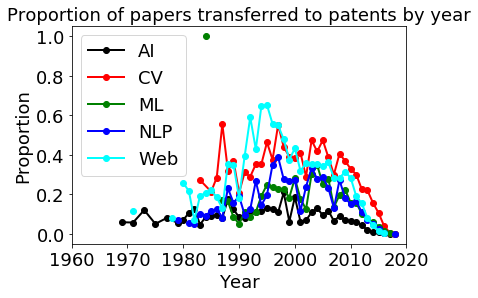

In [82]:
prop_AI_year = number_year_AI/patent_AI_year.groupby('year')['count'].count()
prop_CV_year = number_year_CV/patent_CV_year.groupby('year')['count'].count()
prop_ML_year = number_year_ML/patent_ML_year.groupby('year')['count'].count()
prop_NLP_year = number_year_NLP/patent_NLP_year.groupby('year')['count'].count()
prop_web_year = number_year_web/patent_web_year.groupby('year')['count'].count()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([1960,2020])
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Proportion', fontsize = 18)
plt.title('Proportion of papers transferred to patents by year', fontsize = 18)
plt.plot(prop_AI_year.index, prop_AI_year, 'o-', label = 'AI', color = 'black', linewidth = 2)
plt.plot(prop_CV_year.index, prop_CV_year, 'o-', label = 'CV', color = 'red', linewidth = 2)
plt.plot(prop_ML_year.index, prop_ML_year, 'o-', label = 'ML', color = 'green', linewidth = 2)
plt.plot(prop_NLP_year.index, prop_NLP_year, 'o-', label = 'NLP', color = 'blue', linewidth = 2)
plt.plot(prop_web_year.index, prop_web_year, 'o-', label = 'Web', color = 'cyan', linewidth = 2)
plt.legend(loc = 'upper left')
plt.rc('font', **font)
plt.show()

In [83]:
## Plot aggregate average times a paper gets transferred to patents 
## Only consider papers that get transferred 
f_AI = patent_AI_year['count'].sum()/len(patent_AI_year[patent_AI_year['count']>0])
f_CV = patent_CV_year['count'].sum()/len(patent_CV_year[patent_CV_year['count']>0])
f_ML = patent_ML_year['count'].sum()/len(patent_ML_year[patent_ML_year['count']>0])
f_NLP = patent_NLP_year['count'].sum()/len(patent_NLP_year[patent_NLP_year['count']>0])
f_web = patent_web_year['count'].sum()/len(patent_web_year[patent_web_year['count']>0])

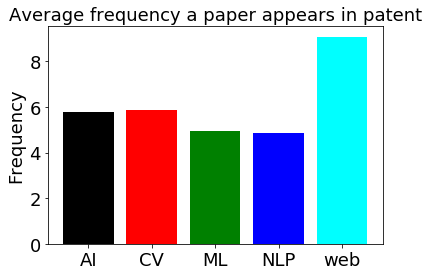

In [84]:
prop = [f_AI, f_CV, f_ML, f_NLP, f_web]
bars = ('AI', 'CV', 'ML', 'NLP', 'web')
plt.bar(bars, prop, color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title('Average frequency a paper appears in patent', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.rc('font', **font)

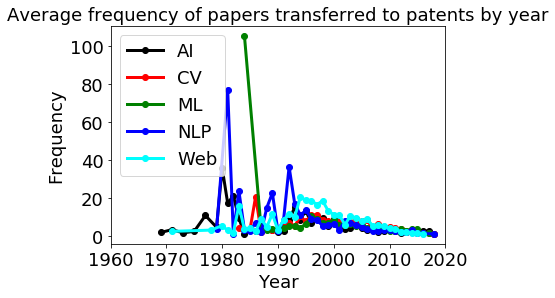

In [85]:
## Plot aggregate average number of times a paper gets transferred to patents per year 
f_AI_year = patent_AI_year[patent_AI_year['count']>0].groupby('year')['count'].sum()/ patent_AI_year[patent_AI_year['count']>0].groupby('year')['count'].count()
f_CV_year = patent_CV_year[patent_CV_year['count']>0].groupby('year')['count'].sum()/ patent_CV_year[patent_CV_year['count']>0].groupby('year')['count'].count()
f_ML_year = patent_ML_year[patent_ML_year['count']>0].groupby('year')['count'].sum()/ patent_ML_year[patent_ML_year['count']>0].groupby('year')['count'].count()
f_NLP_year = patent_NLP_year[patent_NLP_year['count']>0].groupby('year')['count'].sum()/ patent_NLP_year[patent_NLP_year['count']>0].groupby('year')['count'].count()
f_web_year = patent_web_year[patent_web_year['count']>0].groupby('year')['count'].sum()/ patent_web_year[patent_web_year['count']>0].groupby('year')['count'].count()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([1960,2020])
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.title('Average frequency of papers transferred to patents by year', fontsize = 18)
plt.plot(f_AI_year.index, f_AI_year, 'o-', label = 'AI', color = 'black', linewidth = 3)
plt.plot(f_CV_year.index, f_CV_year, 'o-', label = 'CV', color = 'red', linewidth = 3)
plt.plot(f_ML_year.index, f_ML_year, 'o-', label = 'ML', color = 'green', linewidth = 3)
plt.plot(f_NLP_year.index, f_NLP_year, 'o-', label = 'NLP', color = 'blue', linewidth = 3)
plt.plot(f_web_year.index, f_web_year, 'o-', label = 'Web', color = 'cyan', linewidth = 3)
plt.legend(loc = 'upper left')
plt.rc('font', **font)
plt.show()

    
    
    

In [121]:
patent_web_year[patent_web_year['count'] > 200]

,year,paper_id,count
861,1995.0,1988810767,206
1501,1998.0,2066636486,814
1695,1999.0,2026807222,217


Text(0.5, 1.0, 'Distribution of AI paper transfer frequency')

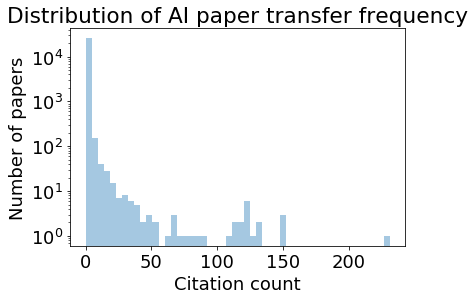

In [103]:
patent_AI_freq = patent_AI_year
sns.distplot(patent_AI_freq['count'],kde=False)
plt.yscale('log')
plt.xlabel('Citation count', fontsize = 18)
plt.ylabel('Number of papers', fontsize = 18)
plt.title('Distribution of AI paper transfer frequency')

Text(0.5, 1.0, 'Distribution of CV paper transfer frequency')

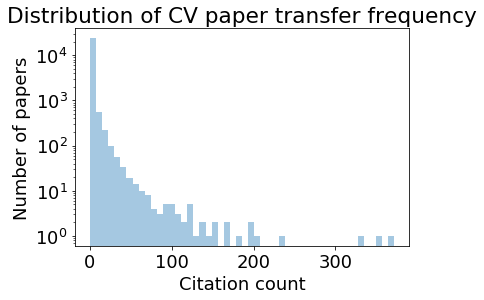

In [104]:
patent_CV_freq = patent_CV_year
sns.distplot(patent_CV_freq['count'],kde=False)
plt.yscale('log')
plt.xlabel('Citation count', fontsize = 18)
plt.ylabel('Number of papers', fontsize = 18)
plt.title('Distribution of CV paper transfer frequency')

Text(0.5, 1.0, 'Distribution of ML paper transfer frequency')

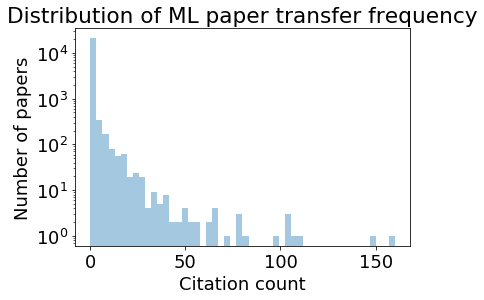

In [122]:
patent_ML_freq = patent_ML_year
sns.distplot(patent_ML_freq['count'],kde=False)
plt.yscale('log')
plt.xlabel('Citation count', fontsize = 18)
plt.ylabel('Number of papers', fontsize = 18)
plt.title('Distribution of ML paper transfer frequency')

Text(0.5, 1.0, 'Distribution of NLP paper transfer frequency')

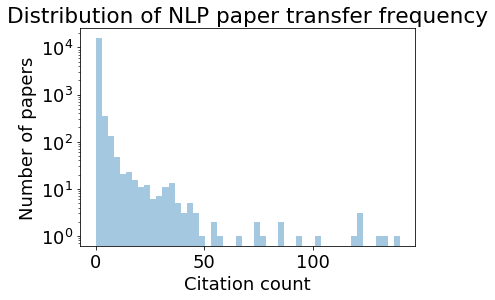

In [123]:
patent_NLP_freq = patent_NLP_year
sns.distplot(patent_NLP_freq['count'],kde=False)
plt.yscale('log')
plt.xlabel('Citation count', fontsize = 18)
plt.ylabel('Number of papers', fontsize = 18)
plt.title('Distribution of NLP paper transfer frequency')

Text(0.5, 1.0, 'Distribution of web paper transfer frequency')

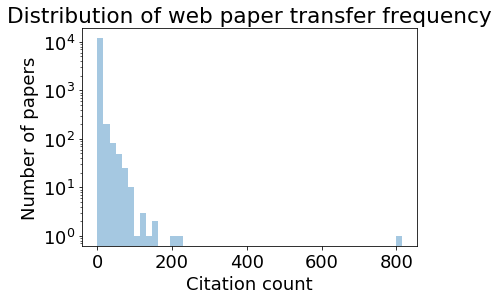

In [124]:
patent_web_freq = patent_web_year
sns.distplot(patent_web_freq['count'],kde=False)
plt.yscale('log')
plt.xlabel('Citation count', fontsize = 18)
plt.ylabel('Number of papers', fontsize = 18)
plt.title('Distribution of web paper transfer frequency')